# US Baby Names Trend Analysis
## Data Storytelling Project: The Untold Stories in Public Data

This project analyzes US baby names dataset to explore naming trends, gender differences, and social changes.

### Project Goals:
- Analyze baby names data from 1880-2023
- Discover naming trends and patterns
- Explore gender differences and social changes
- Create compelling data stories


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set Chinese font and plot style
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the data
print("Loading data...")
df = pd.read_csv('names_all_years.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())


Loading data...
Dataset shape: (2149477, 4)
Columns: ['Name', 'Gender', 'Count', 'Year']
Data types:
Name      object
Gender    object
Count      int64
Year       int64
dtype: object

Missing values:
Name      0
Gender    0
Count     0
Year      0
dtype: int64


In [3]:
# Basic data exploration
print("=== Basic Statistics ===")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Total records: {len(df):,}")
print(f"Total births: {df['Count'].sum():,}")
print(f"Unique names: {df['Name'].nunique():,}")

print(f"\nGender distribution:")
print(df['Gender'].value_counts())

# Display first few rows
print(f"\nFirst 5 rows:")
df.head()


=== Basic Statistics ===
Year range: 1880 - 2024
Total records: 2,149,477
Total births: 372,009,150
Unique names: 104,819

Gender distribution:
Gender
F    1263426
M     886051
Name: count, dtype: int64

First 5 rows:


,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


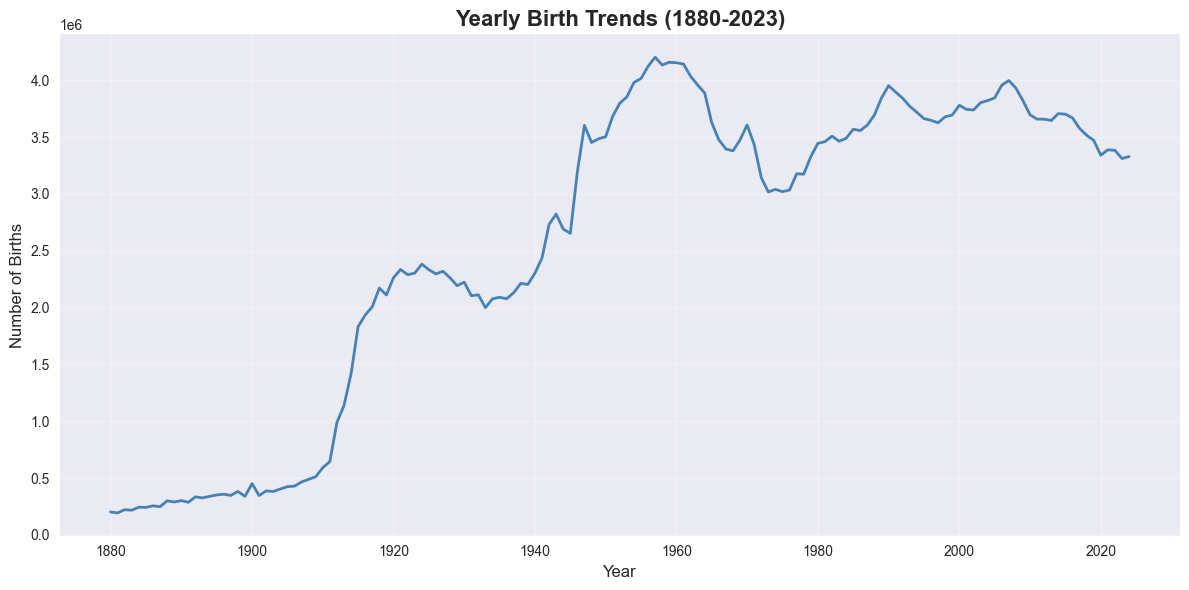

Peak birth year: 1957 (4,202,143 births)
Lowest birth year: 1881 (192,688 births)


In [4]:
# Analyze yearly birth trends
yearly_total = df.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
yearly_total.plot(color='steelblue', linewidth=2)
plt.title('Yearly Birth Trends (1880-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Births', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak birth year: {yearly_total.idxmax()} ({yearly_total.max():,} births)")
print(f"Lowest birth year: {yearly_total.idxmin()} ({yearly_total.min():,} births)")


<Figure size 1200x600 with 0 Axes>

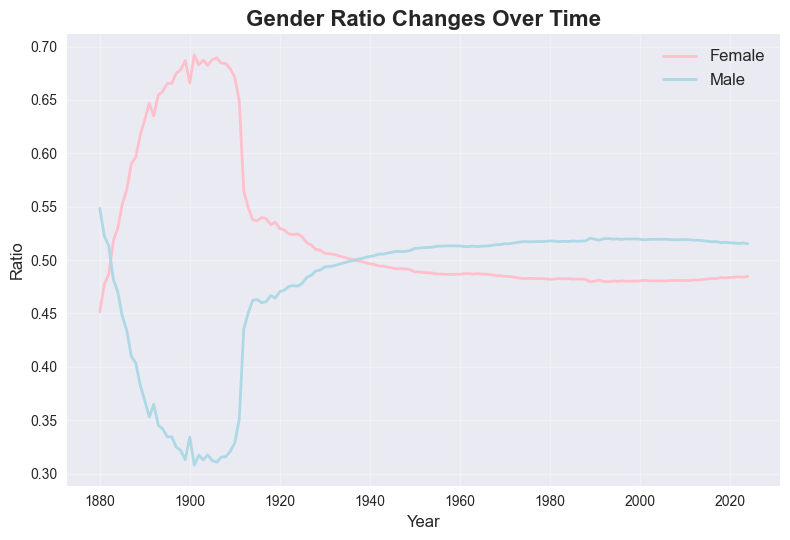

Average female ratio: 0.523
Average male ratio: 0.477


In [5]:
# Analyze gender ratio changes
yearly_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
yearly_gender['F_ratio'] = yearly_gender['F'] / (yearly_gender['F'] + yearly_gender['M'])
yearly_gender['M_ratio'] = yearly_gender['M'] / (yearly_gender['F'] + yearly_gender['M'])

plt.figure(figsize=(12, 6))
yearly_gender[['F_ratio', 'M_ratio']].plot(color=['pink', 'lightblue'], linewidth=2)
plt.title('Gender Ratio Changes Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.legend(['Female', 'Male'], fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average female ratio: {yearly_gender['F_ratio'].mean():.3f}")
print(f"Average male ratio: {yearly_gender['M_ratio'].mean():.3f}")


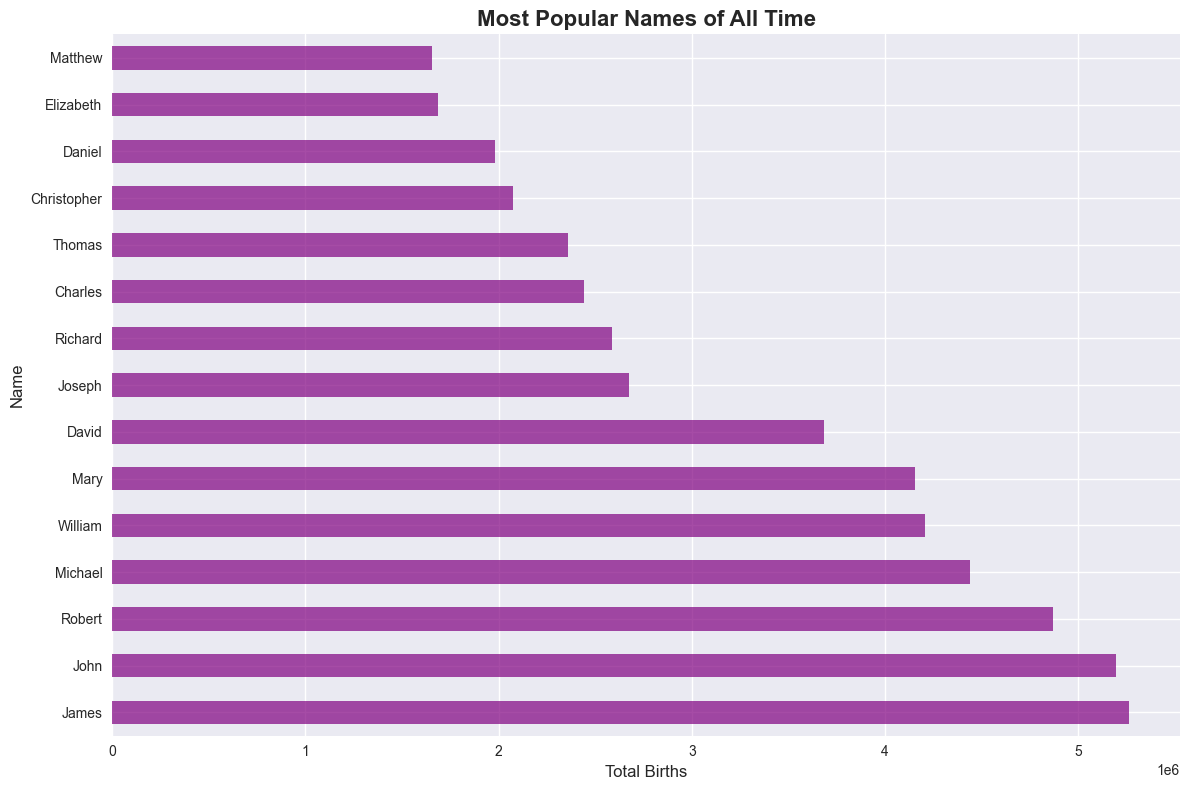

Most popular names of all time:
 1. James: 5,262,396
 2. John: 5,196,210
 3. Robert: 4,866,007
 4. Michael: 4,440,391
 5. William: 4,205,026
 6. Mary: 4,154,332
 7. David: 3,682,683
 8. Joseph: 2,672,746
 9. Richard: 2,585,535
10. Charles: 2,441,151
11. Thomas: 2,360,128
12. Christopher: 2,074,303
13. Daniel: 1,982,857
14. Elizabeth: 1,687,089
15. Matthew: 1,652,565


In [6]:
# Analyze most popular names of all time
top_names_all_time = df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
top_names_all_time.plot(kind='barh', color='purple', alpha=0.7)
plt.title('Most Popular Names of All Time', fontsize=16, fontweight='bold')
plt.xlabel('Total Births', fontsize=12)
plt.ylabel('Name', fontsize=12)
plt.tight_layout()
plt.show()

print("Most popular names of all time:")
for i, (name, count) in enumerate(top_names_all_time.items(), 1):
    print(f"{i:2d}. {name}: {count:,}")


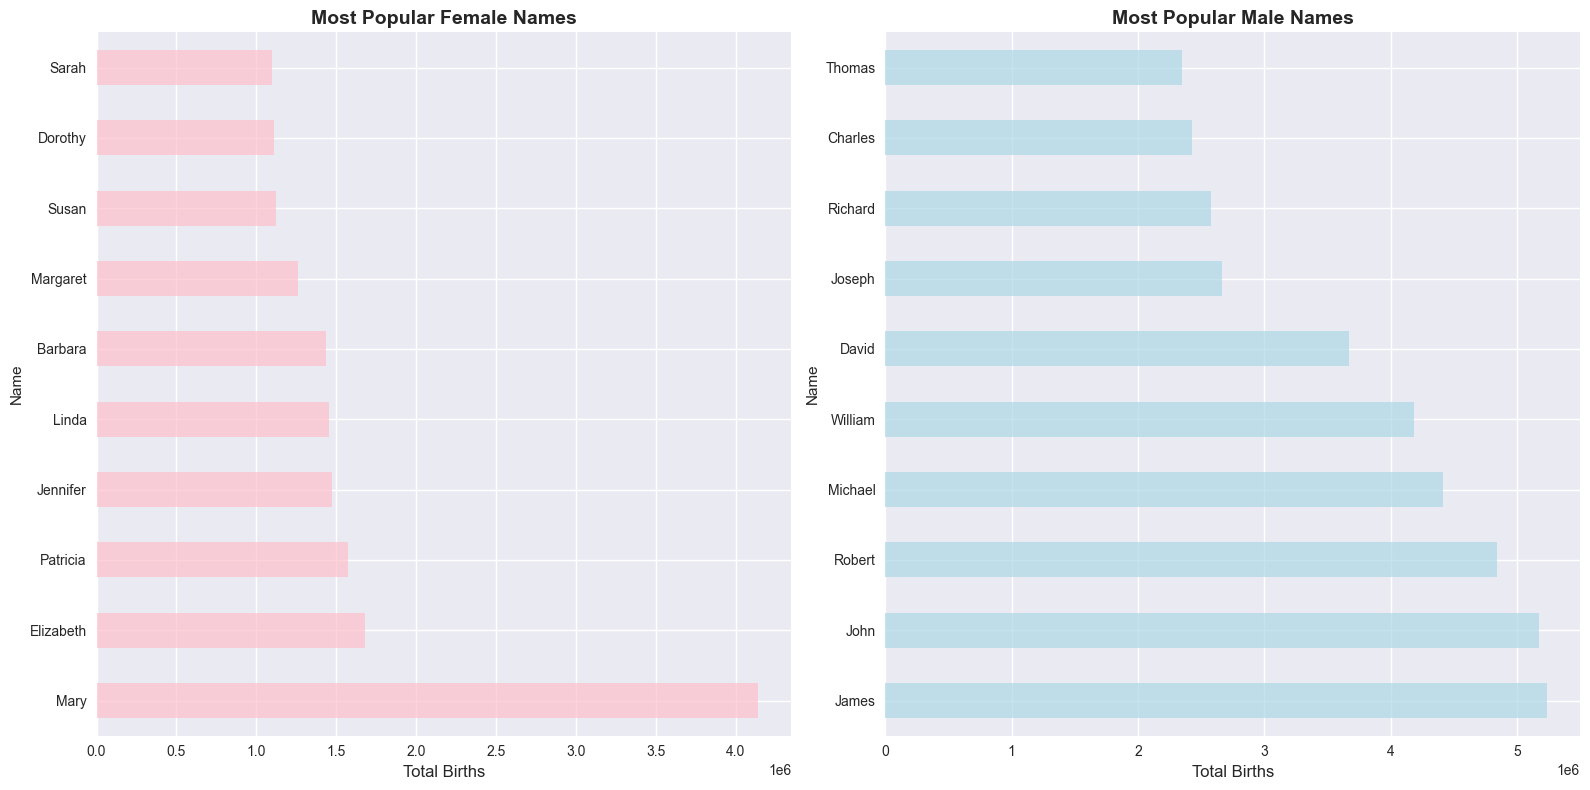

Most popular female names:
 1. Mary: 4,139,160
 2. Elizabeth: 1,681,878
 3. Patricia: 1,573,445
 4. Jennifer: 1,471,191
 5. Linda: 1,454,832
 6. Barbara: 1,436,402
 7. Margaret: 1,262,307
 8. Susan: 1,123,232
 9. Dorothy: 1,111,479
10. Sarah: 1,095,724

Most popular male names:
 1. James: 5,238,570
 2. John: 5,174,470
 3. Robert: 4,845,891
 4. Michael: 4,418,526
 5. William: 4,189,004
 6. David: 3,669,730
 7. Joseph: 2,662,040
 8. Richard: 2,576,005
 9. Charles: 2,428,685
10. Thomas: 2,351,624


In [7]:
# Analyze most popular names by gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Female names
top_female = df[df['Gender'] == 'F'].groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
top_female.plot(kind='barh', ax=ax1, color='pink', alpha=0.7)
ax1.set_title('Most Popular Female Names', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Births', fontsize=12)

# Male names
top_male = df[df['Gender'] == 'M'].groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
top_male.plot(kind='barh', ax=ax2, color='lightblue', alpha=0.7)
ax2.set_title('Most Popular Male Names', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Births', fontsize=12)

plt.tight_layout()
plt.show()

print("Most popular female names:")
for i, (name, count) in enumerate(top_female.items(), 1):
    print(f"{i:2d}. {name}: {count:,}")

print("\nMost popular male names:")
for i, (name, count) in enumerate(top_male.items(), 1):
    print(f"{i:2d}. {name}: {count:,}")


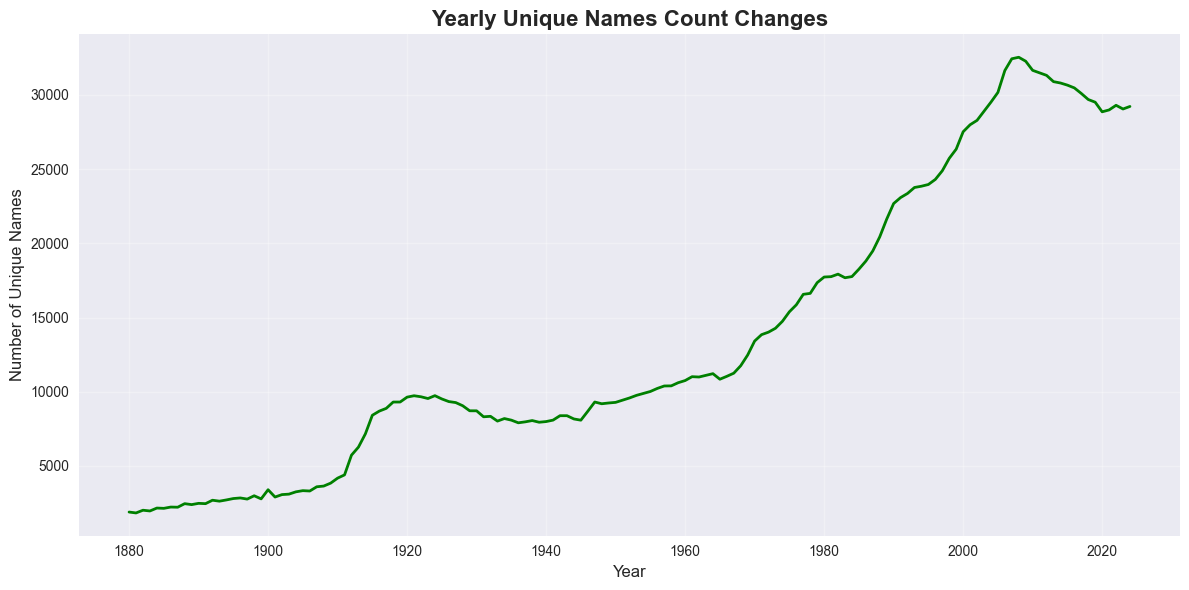

Name diversity range: 1,829 - 32,541
2023 unique names: 29,054
1880 unique names: 1,889


In [8]:
# Analyze name diversity changes
yearly_diversity = df.groupby('Year')['Name'].nunique()

plt.figure(figsize=(12, 6))
yearly_diversity.plot(color='green', linewidth=2)
plt.title('Yearly Unique Names Count Changes', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Names', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Name diversity range: {yearly_diversity.min():,} - {yearly_diversity.max():,}")
print(f"2023 unique names: {yearly_diversity[2023]:,}")
print(f"1880 unique names: {yearly_diversity[1880]:,}")


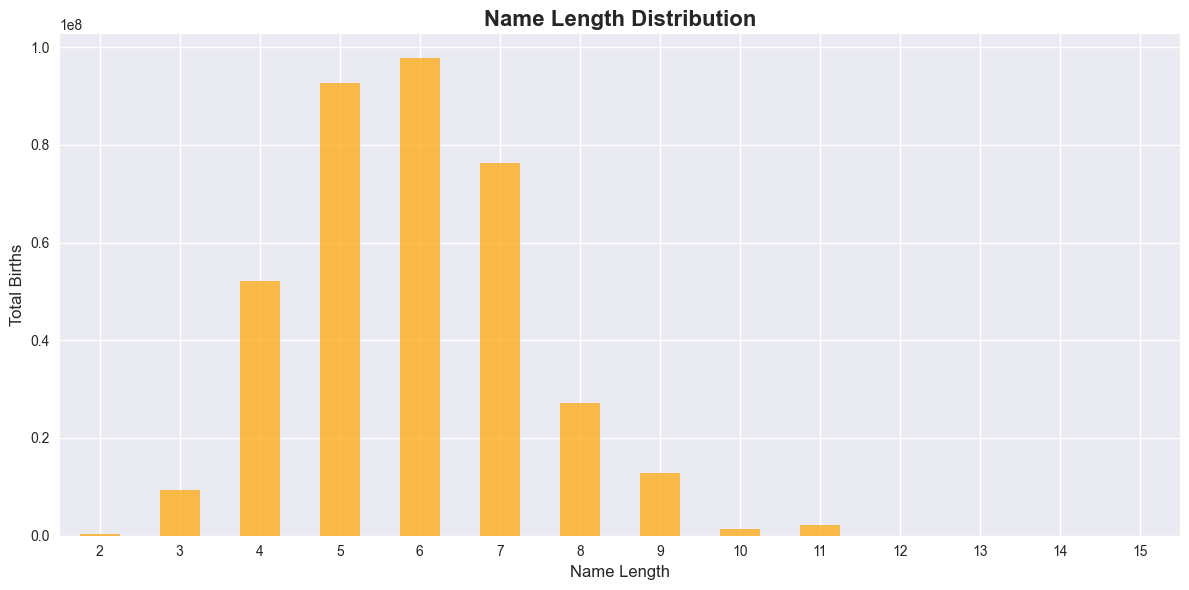

Average name length: 6.16
Most common name length: 6
Name length range: 2 - 15


In [9]:
# Analyze name length distribution
df['name_length'] = df['Name'].str.len()

plt.figure(figsize=(12, 6))
length_dist = df.groupby('name_length')['Count'].sum()
length_dist.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Name Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Name Length', fontsize=12)
plt.ylabel('Total Births', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Average name length: {df['name_length'].mean():.2f}")
print(f"Most common name length: {df['name_length'].mode().iloc[0]}")
print(f"Name length range: {df['name_length'].min()} - {df['name_length'].max()}")


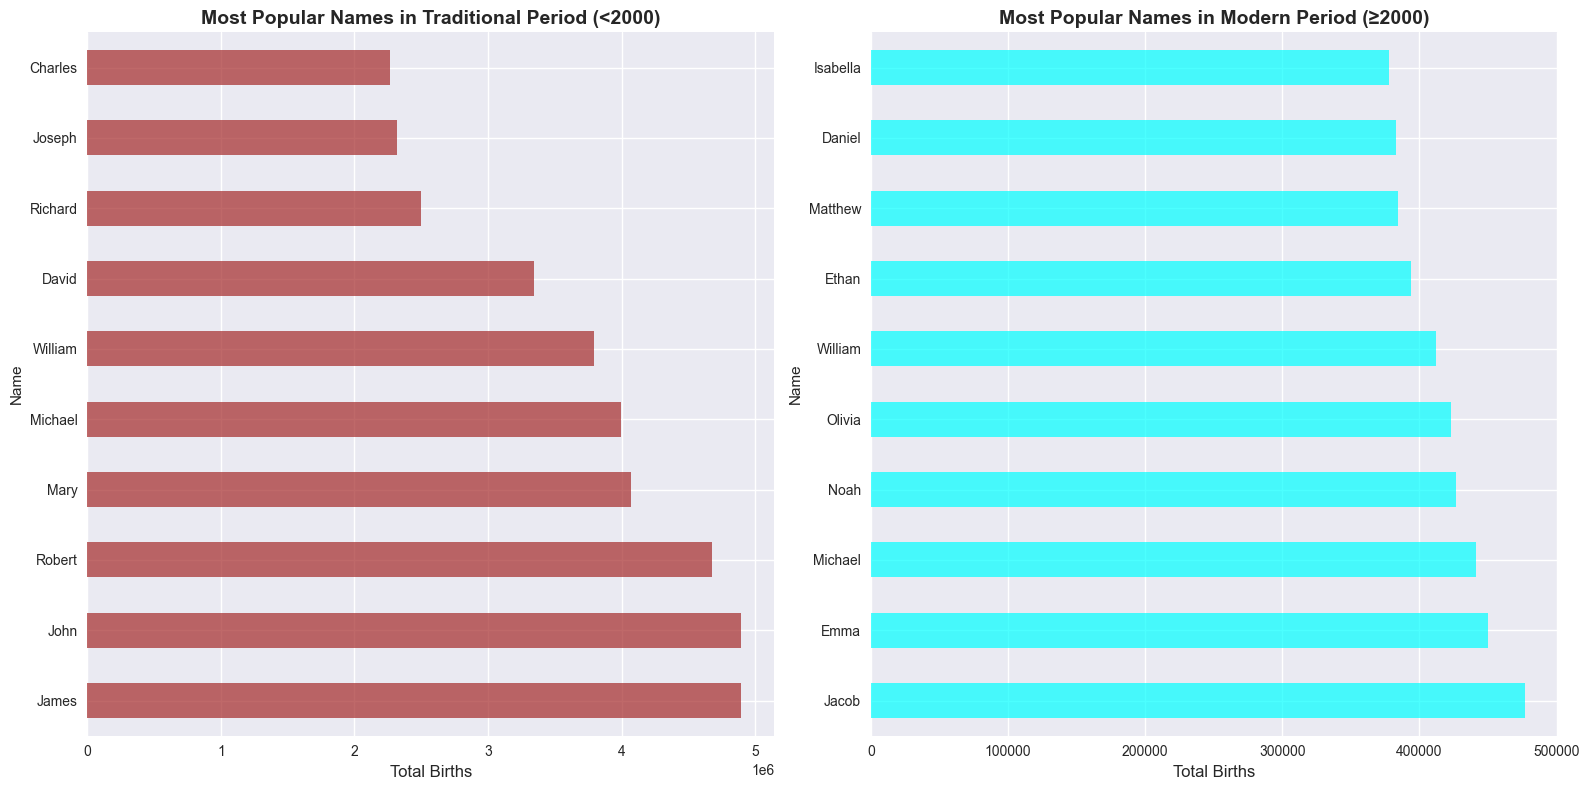

Most popular names in traditional period (<2000):
 1. James: 4,897,848
 2. John: 4,891,608
 3. Robert: 4,675,961
 4. Mary: 4,071,490
 5. Michael: 3,998,806
 6. William: 3,792,645
 7. David: 3,346,635
 8. Richard: 2,501,625
 9. Joseph: 2,322,613
10. Charles: 2,266,301

Most popular names in modern period (≥2000):
 1. Jacob: 477,027
 2. Emma: 449,780
 3. Michael: 441,585
 4. Noah: 426,449
 5. Olivia: 423,247
 6. William: 412,381
 7. Ethan: 394,181
 8. Matthew: 384,256
 9. Daniel: 383,224
10. Isabella: 377,452


In [10]:
# Analyze traditional vs modern names (using 2000 as cutoff)
traditional = df[df['Year'] < 2000].groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
modern = df[df['Year'] >= 2000].groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Traditional period names
traditional.plot(kind='barh', ax=ax1, color='brown', alpha=0.7)
ax1.set_title('Most Popular Names in Traditional Period (<2000)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Births', fontsize=12)

# Modern period names
modern.plot(kind='barh', ax=ax2, color='cyan', alpha=0.7)
ax2.set_title('Most Popular Names in Modern Period (≥2000)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Births', fontsize=12)

plt.tight_layout()
plt.show()

print("Most popular names in traditional period (<2000):")
for i, (name, count) in enumerate(traditional.items(), 1):
    print(f"{i:2d}. {name}: {count:,}")

print("\nMost popular names in modern period (≥2000):")
for i, (name, count) in enumerate(modern.items(), 1):
    print(f"{i:2d}. {name}: {count:,}")
